# ***Loading and Preprocessing Data***

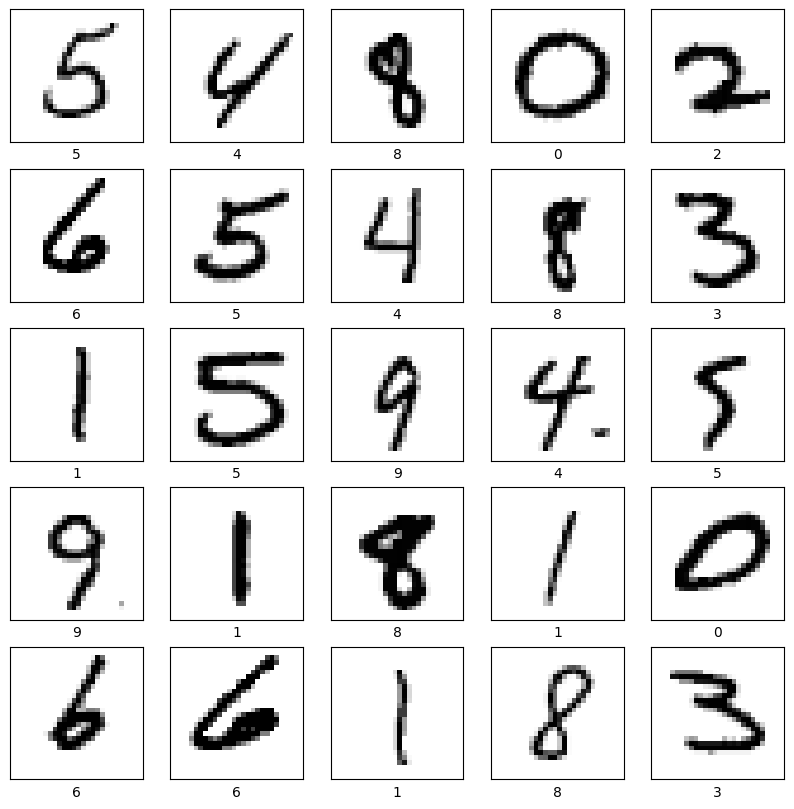

In [7]:
import numpy as np
import arff
from scipy.io import arff
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def load_data(file_path):
    data, meta = arff.loadarff(file_path)
    
    # Convert to a structured numpy array
    data = np.asarray(data.tolist(), dtype=np.float32)
    
    X = data[:, :-1]  # Features
    y = data[:, -1].astype(int)  # Labels
    
    X /= 255.0  # Normalize the data
    return train_test_split(X, y, test_size=0.2, random_state=42)

def visualize_sample(X, y):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(y[i])
    plt.show()

# Load data
file_path = 'D:/INTERVIEW_EXERCISES/EXERCISES_1/data/mnist_784.arff'  # path to data
X_train, X_test, y_train, y_test = load_data(file_path)

# Visualize samples
visualize_sample(X_train, y_train)

# ***Defining Logistic Regression Classes And Training***

In [17]:
class LogisticRegression:
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, h, y):
        m = y.shape[0]
        return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros((n, 1))
        y = y.reshape(m, 1)

        for i in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient


            if i % 100 == 0:
                cost = self.cost_function(h, y)
                print(f'Cost after iteration {i}: {cost}')

    def predict(self, X):
        z = np.dot(X, self.theta)
        return self.sigmoid(z)

    def save_weights(self, file_path):
        np.save(file_path, self.theta)

    def load_weights(self, file_path):
        self.theta = np.load(file_path)

class OneVsAllLogisticRegression:
    def __init__(self, num_classes, learning_rate=0.1, num_iterations=1000):
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.models = []

    def fit(self, X, y):
        for i in range(self.num_classes):
            y_i = np.where(y == i, 1, 0)
            model = LogisticRegression(self.learning_rate, self.num_iterations)
            print(f'Training model for class {i}')
            model.fit(X, y_i)
            self.models.append(model)

    def predict(self, X):
        predictions = np.zeros((X.shape[0], self.num_classes))
        for i in range(self.num_classes):
            predictions[:, i] = self.models[i].predict(X).ravel()
        return np.argmax(predictions, axis=1)

    def save_weights(self, file_path_prefix):
        for i, model in enumerate(self.models):
            model.save_weights(f'{file_path_prefix}_class_{i}.npy')

    def load_weights(self, file_path_prefix):
        self.models = []
        for i in range(self.num_classes):
            model = LogisticRegression()
            model.load_weights(f'{file_path_prefix}_class_{i}.npy')
            self.models.append(model)

num_classes = 10
model = OneVsAllLogisticRegression(num_classes)

# Training model
print('Starting training...')
model.fit(X_train, y_train)

print('Saving weights...')
model.save_weights('/content/drive/MyDrive/...../mnist_logistic_regression_weights') #path saves weights

Starting training...
Training model for class 0
Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.08231275849068839
Cost after iteration 200: 0.06493012966389905
Cost after iteration 300: 0.05727490355352928
Cost after iteration 400: 0.05275395639827881
Cost after iteration 500: 0.049702336631018085
Cost after iteration 600: 0.047474174213476224
Cost after iteration 700: 0.04576021350668601
Cost after iteration 800: 0.044391798727819384
Cost after iteration 900: 0.043268307409710945
Training model for class 1
Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.0722049296754257
Cost after iteration 200: 0.05656857804415463
Cost after iteration 300: 0.05013271956711455
Cost after iteration 400: 0.04646764301848362
Cost after iteration 500: 0.04404972308452224
Cost after iteration 600: 0.042310738281073644
Cost after iteration 700: 0.04098597339911305
Cost after iteration 800: 0.03993419148676548
Cost after iteration 900: 0.039072719963404896
Traini

# ***Evaluating the Model***

In [8]:
import numpy as np
import os

class LogisticRegression:
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, h, y):
        m = y.shape[0]
        return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros((n, 1))
        y = y.reshape(m, 1)

        for i in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient

            if i % 100 == 0:
                cost = self.cost_function(h, y)
                print(f'Cost after iteration {i}: {cost}')

    def predict(self, X):
        z = np.dot(X, self.theta)
        return self.sigmoid(z)

    def save_weights(self, file_path):
        np.save(file_path, self.theta)

    def load_weights(self, file_path):
        self.theta = np.load(file_path)

class OneVsAllLogisticRegression:
    def __init__(self, num_classes, learning_rate=0.1, num_iterations=1000):
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.models = []

    def fit(self, X, y):
        for i in range(self.num_classes):
            y_i = np.where(y == i, 1, 0)
            model = LogisticRegression(self.learning_rate, self.num_iterations)
            print(f'Training model for class {i}')
            model.fit(X, y_i)
            self.models.append(model)

    def predict(self, X):
        predictions = np.zeros((X.shape[0], self.num_classes))
        for i in range(self.num_classes):
            predictions[:, i] = self.models[i].predict(X).ravel()
        return np.argmax(predictions, axis=1)

    def save_weights(self, file_path_prefix):
        for i, model in enumerate(self.models):
            model.save_weights(f'{file_path_prefix}_class_{i}.npy')

    def load_weights(self, file_path_prefix):
        self.models = []
        for i in range(self.num_classes):
            file_path = f'{file_path_prefix}_class_{i}.npy'
            if os.path.exists(file_path):
                model = LogisticRegression()
                model.load_weights(file_path)
                self.models.append(model)
            else:
                raise FileNotFoundError(f'File not found: {file_path}')


num_classes = 10
model = OneVsAllLogisticRegression(num_classes)

# Load weights
try:
    model.load_weights('D:/INTERVIEW_EXERCISES/EXERCISES_1/weights/mnist_logistic_regression_weights')
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print(f'Accuracy: {accuracy * 100:.2f}%')
except FileNotFoundError as e:
    print(e)

Accuracy: 89.16%


# ***Visualize Predictions***

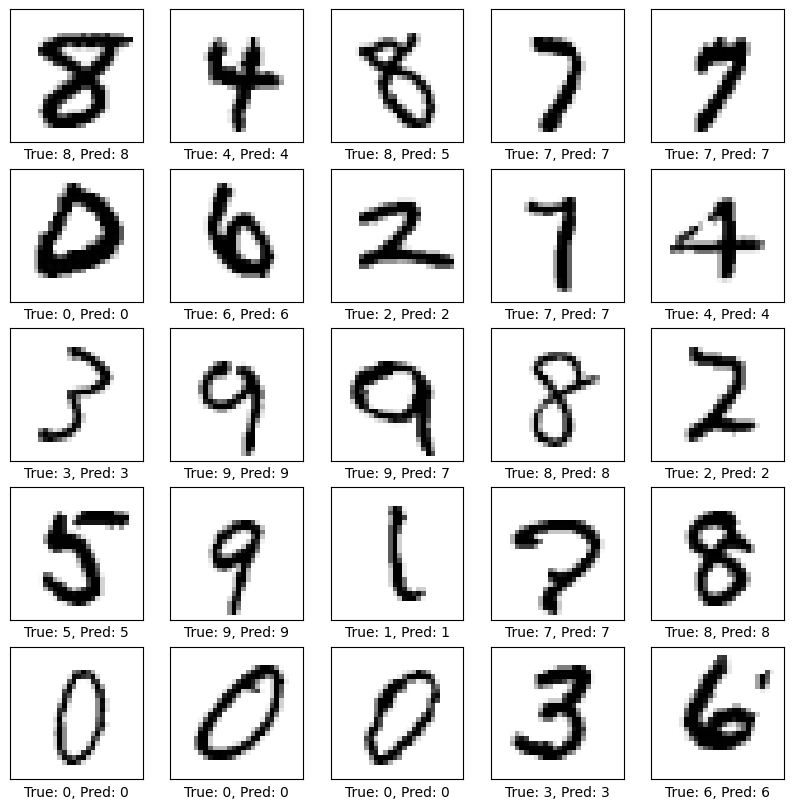

In [9]:
def visualize_predictions(X, y_true, y_pred):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(f'True: {y_true[i]}, Pred: {y_pred[i]}')
    plt.show()

# Visualize predictions
visualize_predictions(X_test, y_test, y_pred)